In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_raw_counts_matrix_v00.parquet')
# fdf = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_counts_matrix_v00.parquet')
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_raw_usage_matrix_v00.parquet')
fdf = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_usage_matrix_v00.parquet')

df['sex'] = 'm'
fdf['sex'] = 'f'
concat_df = pd.concat([df, fdf]).set_index('sex', append=True).astype(np.float32)

In [15]:
usage_order = concat_df.mean().sort_values(ascending=False).index

In [16]:
diffs = []
for age, _df in concat_df.groupby('age'):
    _diffs = _df.groupby('sex').mean()
    _diffs['age'] = age
    _diffs = _diffs.set_index('age', append=True)
    diffs.append(_diffs)

In [17]:
diffs = pd.concat(diffs)

mask = diffs.groupby('age')[0].count() == 1
drop_idx = mask[mask].index

diffs = diffs.drop(drop_idx, level='age')

In [18]:
sex_diffs = diffs.groupby('age').diff().dropna(axis=0).rolling(5, center=True, win_type='exponential', min_periods=1).mean(tau=1.5)
sex_diffs = sex_diffs.droplevel(level='sex')

Text(0.5, 1.0, 'Sex - ontogeny')

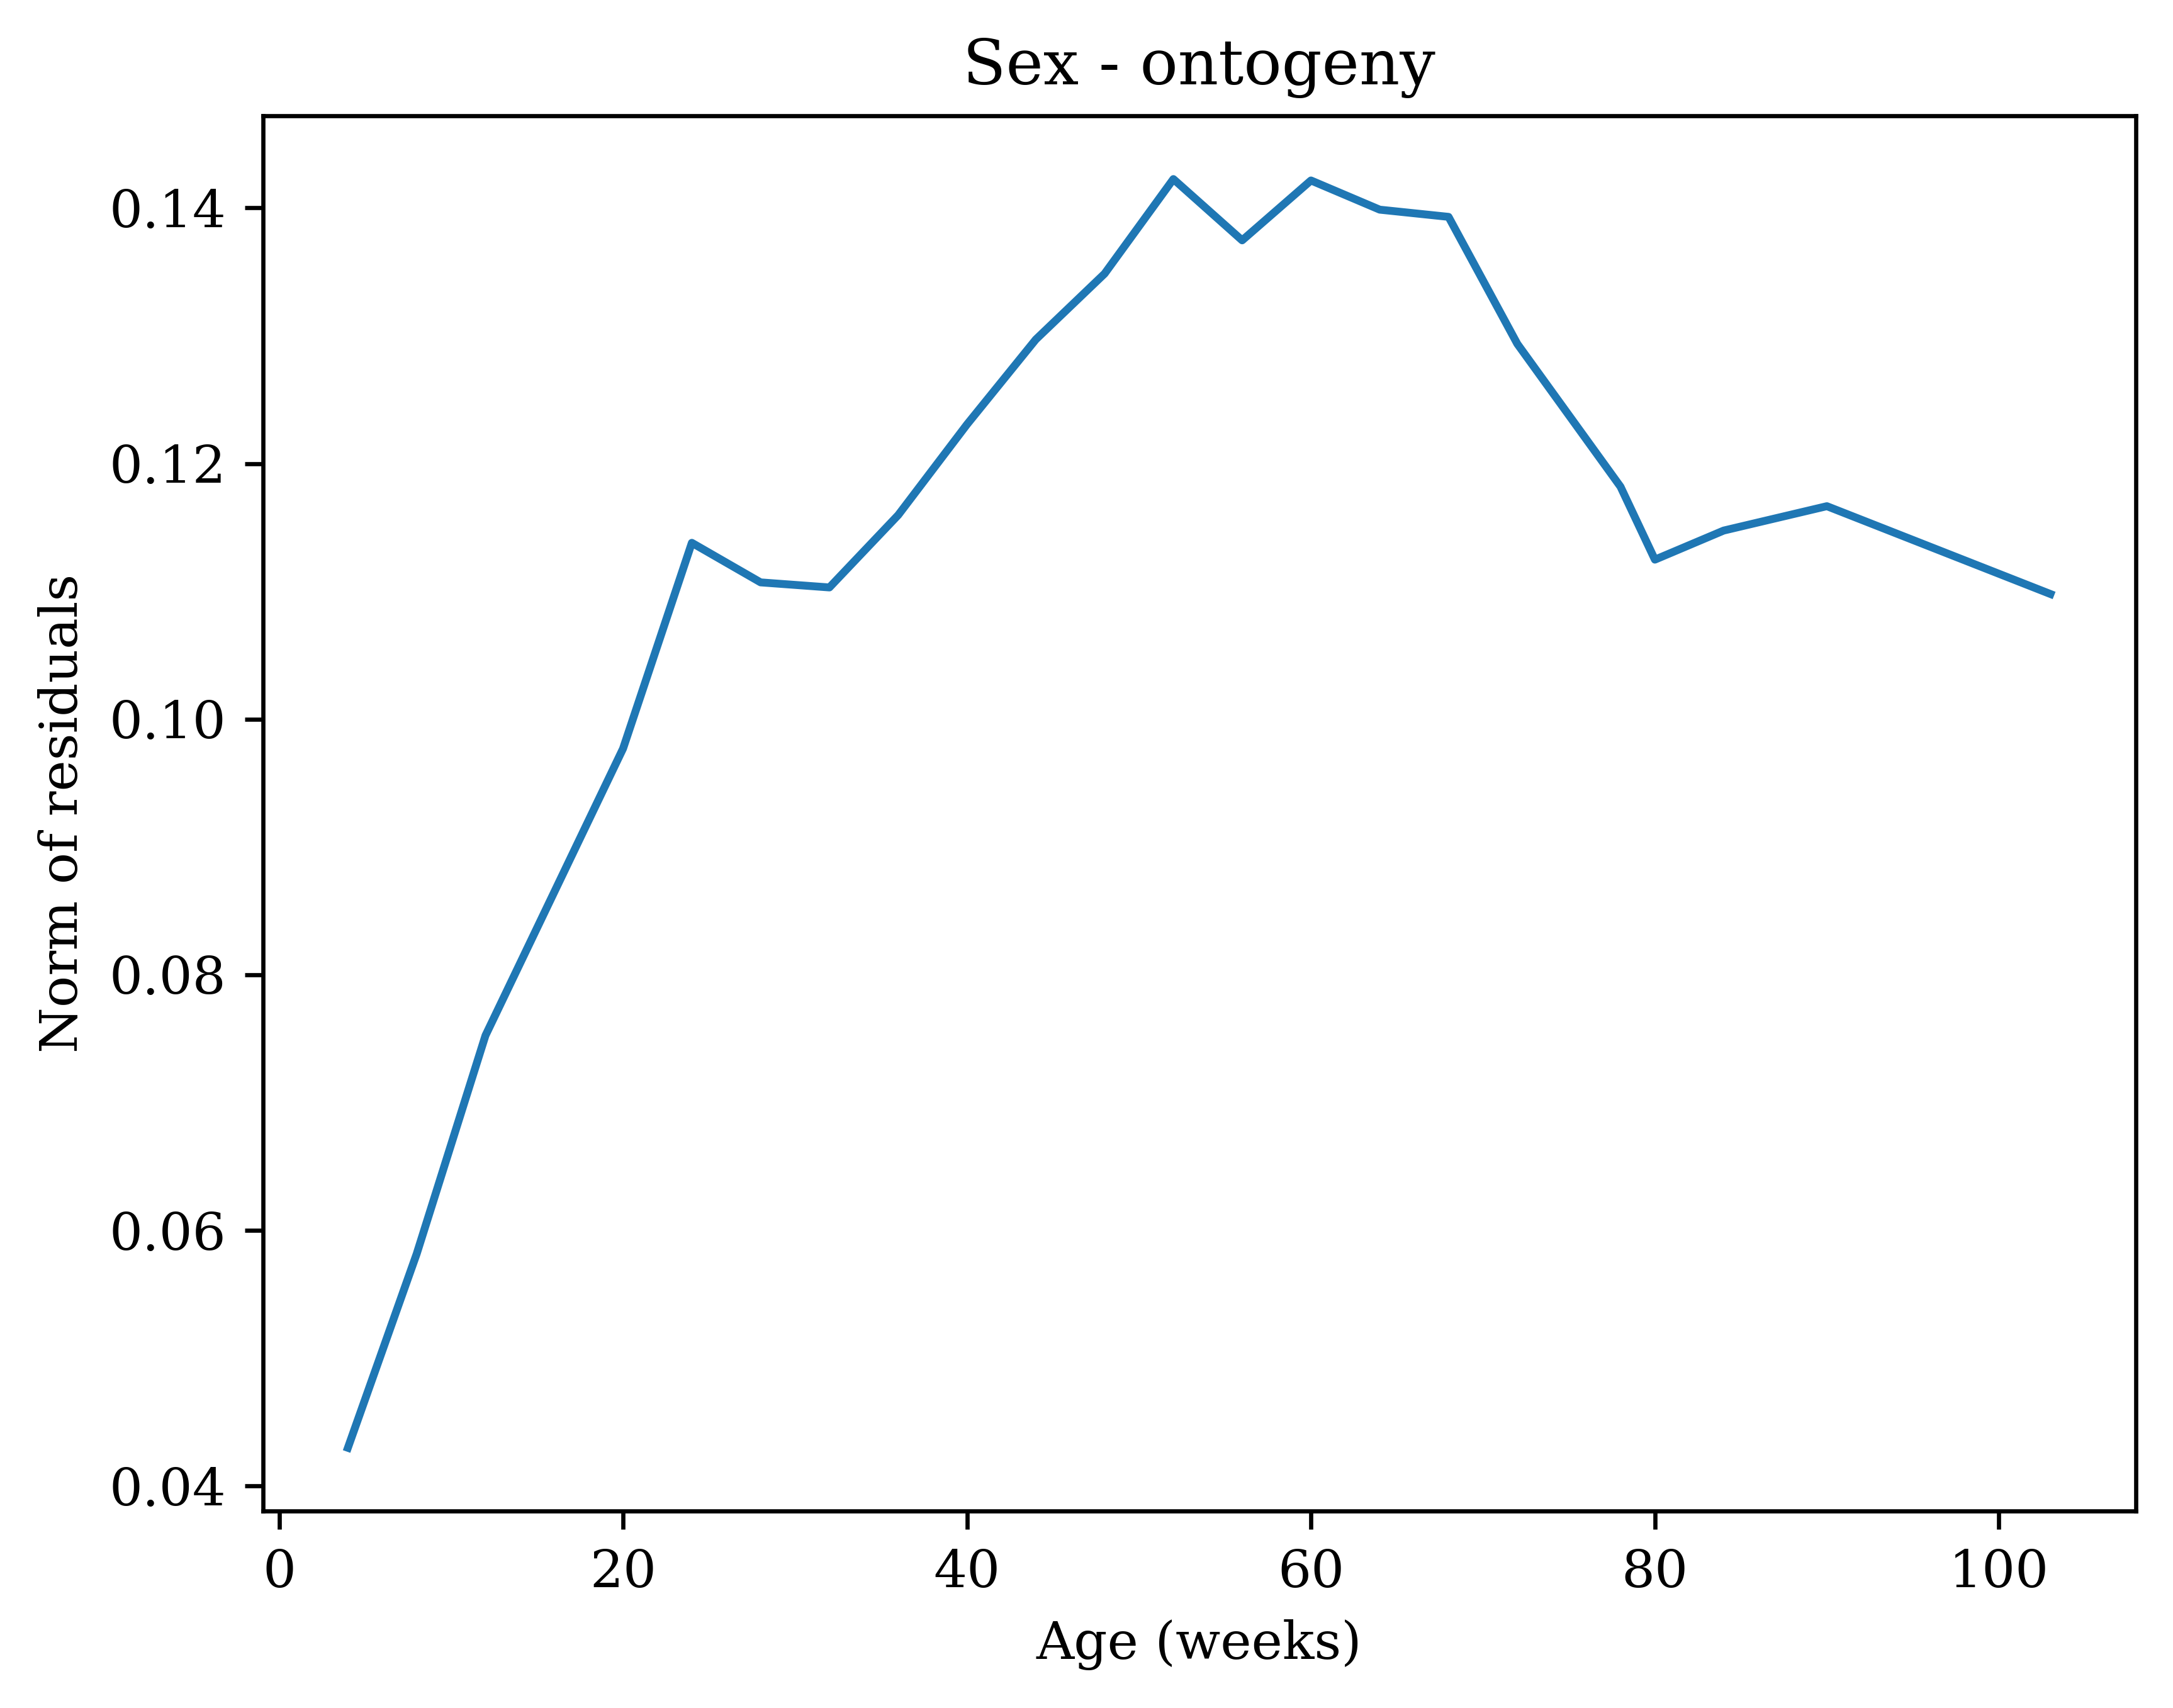

In [19]:
plt.plot(sex_diffs.index, np.linalg.norm(sex_diffs, axis=1))
plt.xlabel('Age (weeks)')
plt.ylabel('Norm of residuals') 
plt.title("Sex - ontogeny")

<Axes: xlabel='age', ylabel='syllables'>

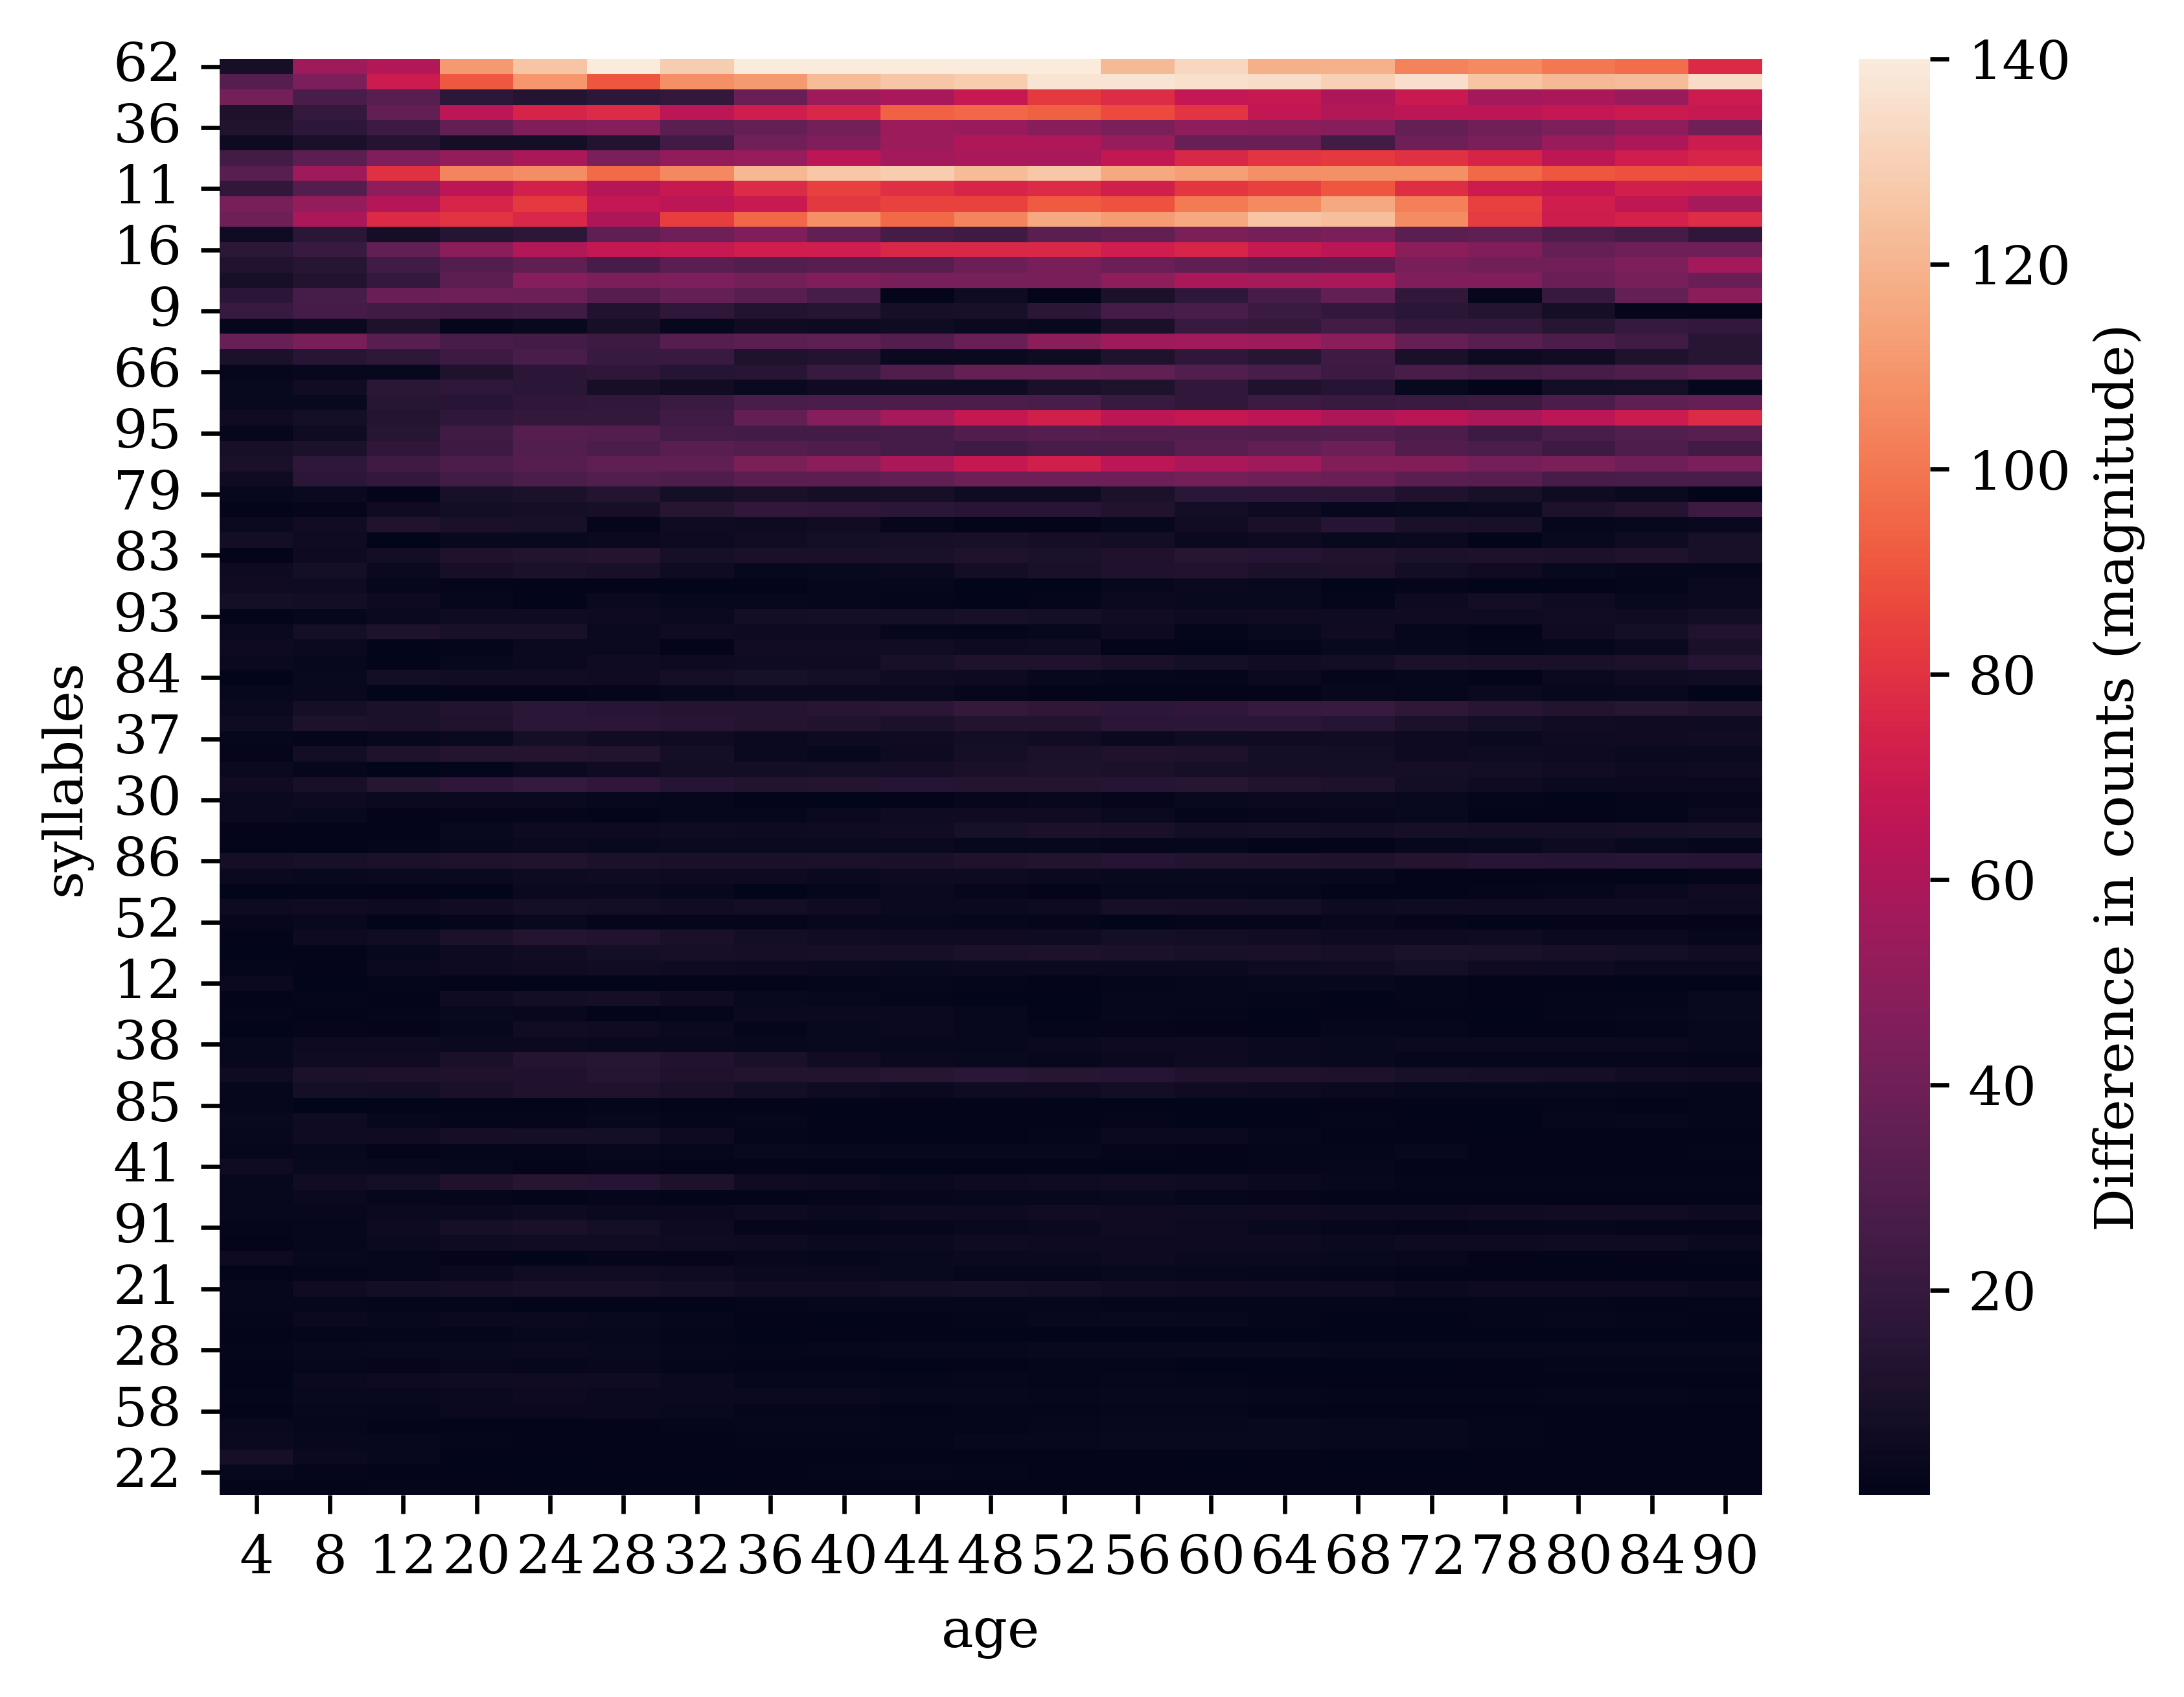

In [93]:
sns.heatmap(sex_diffs[usage_order].abs().T, cbar_kws=dict(label='Difference in counts (magnitude)'), vmax=140)

<Axes: xlabel='age', ylabel='syllables'>

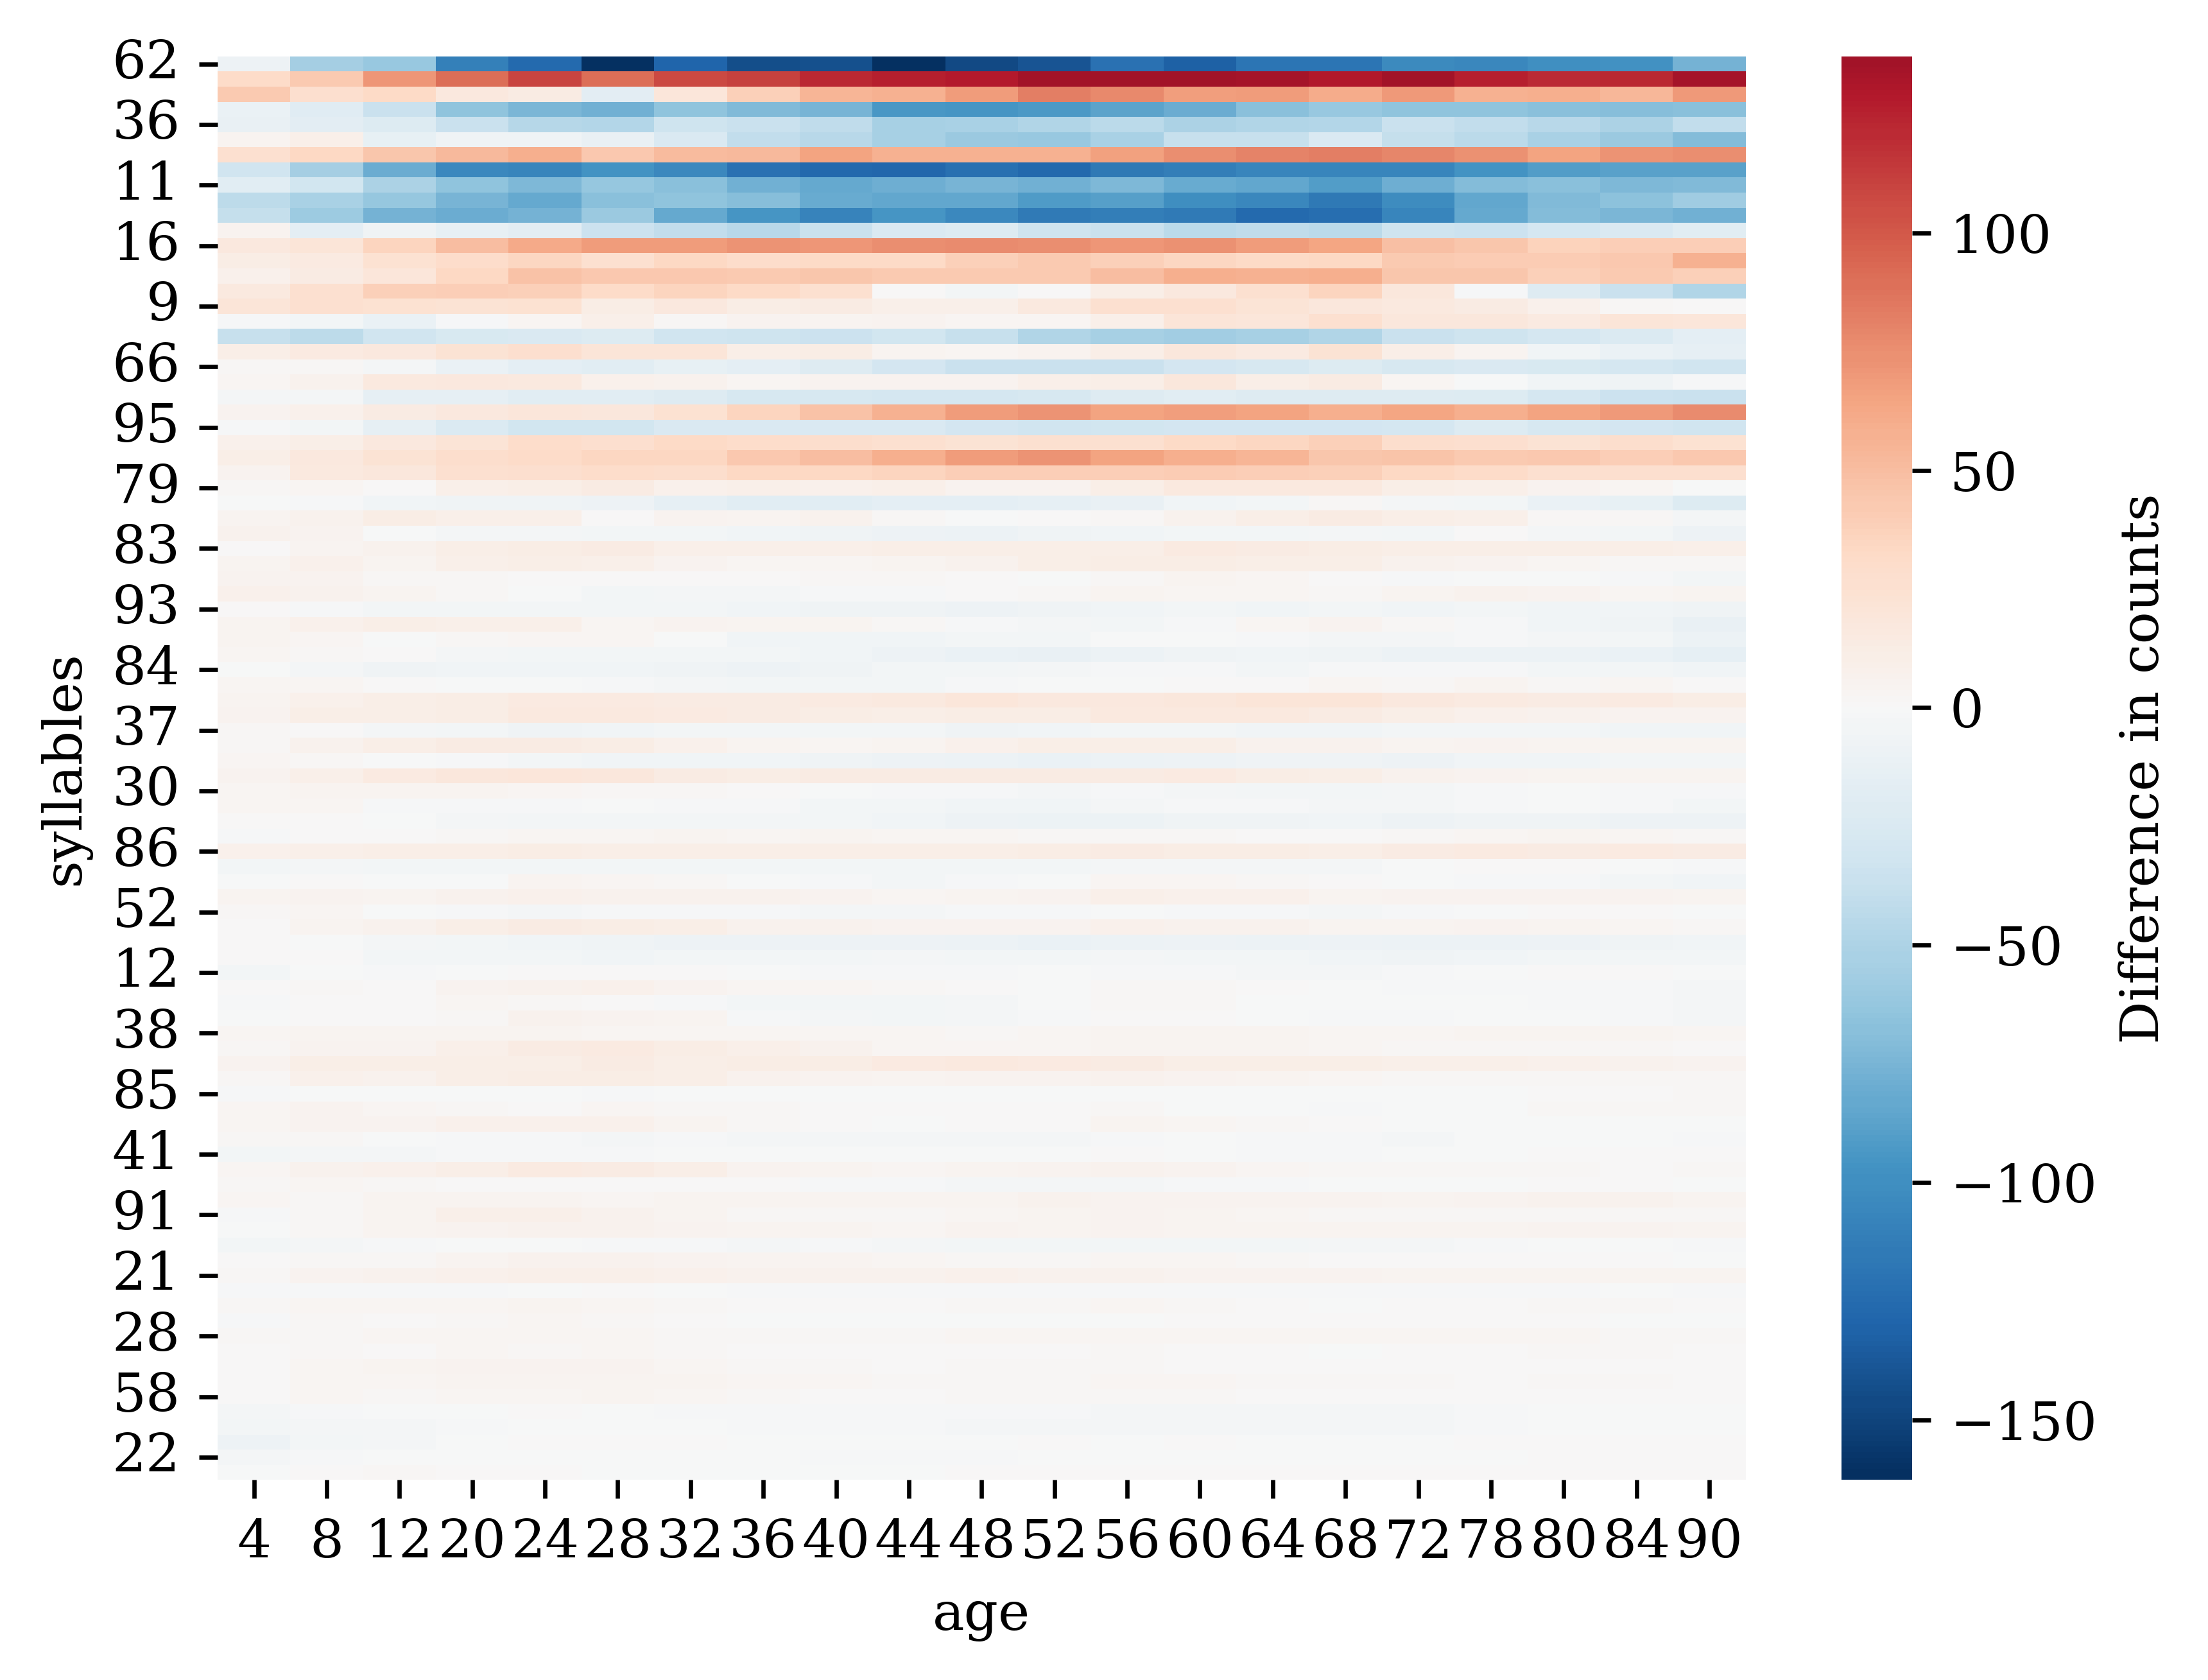

In [94]:
sns.heatmap(sex_diffs[usage_order].T, cbar_kws=dict(label='Difference in counts'), center=0, cmap='RdBu_r')

In [95]:
def zscore(arr):
    return (arr - arr.mean()) / arr.std()

def minmax(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

[Text(0, 0.5, 'Avg minmax normalized difference (magnitude)')]

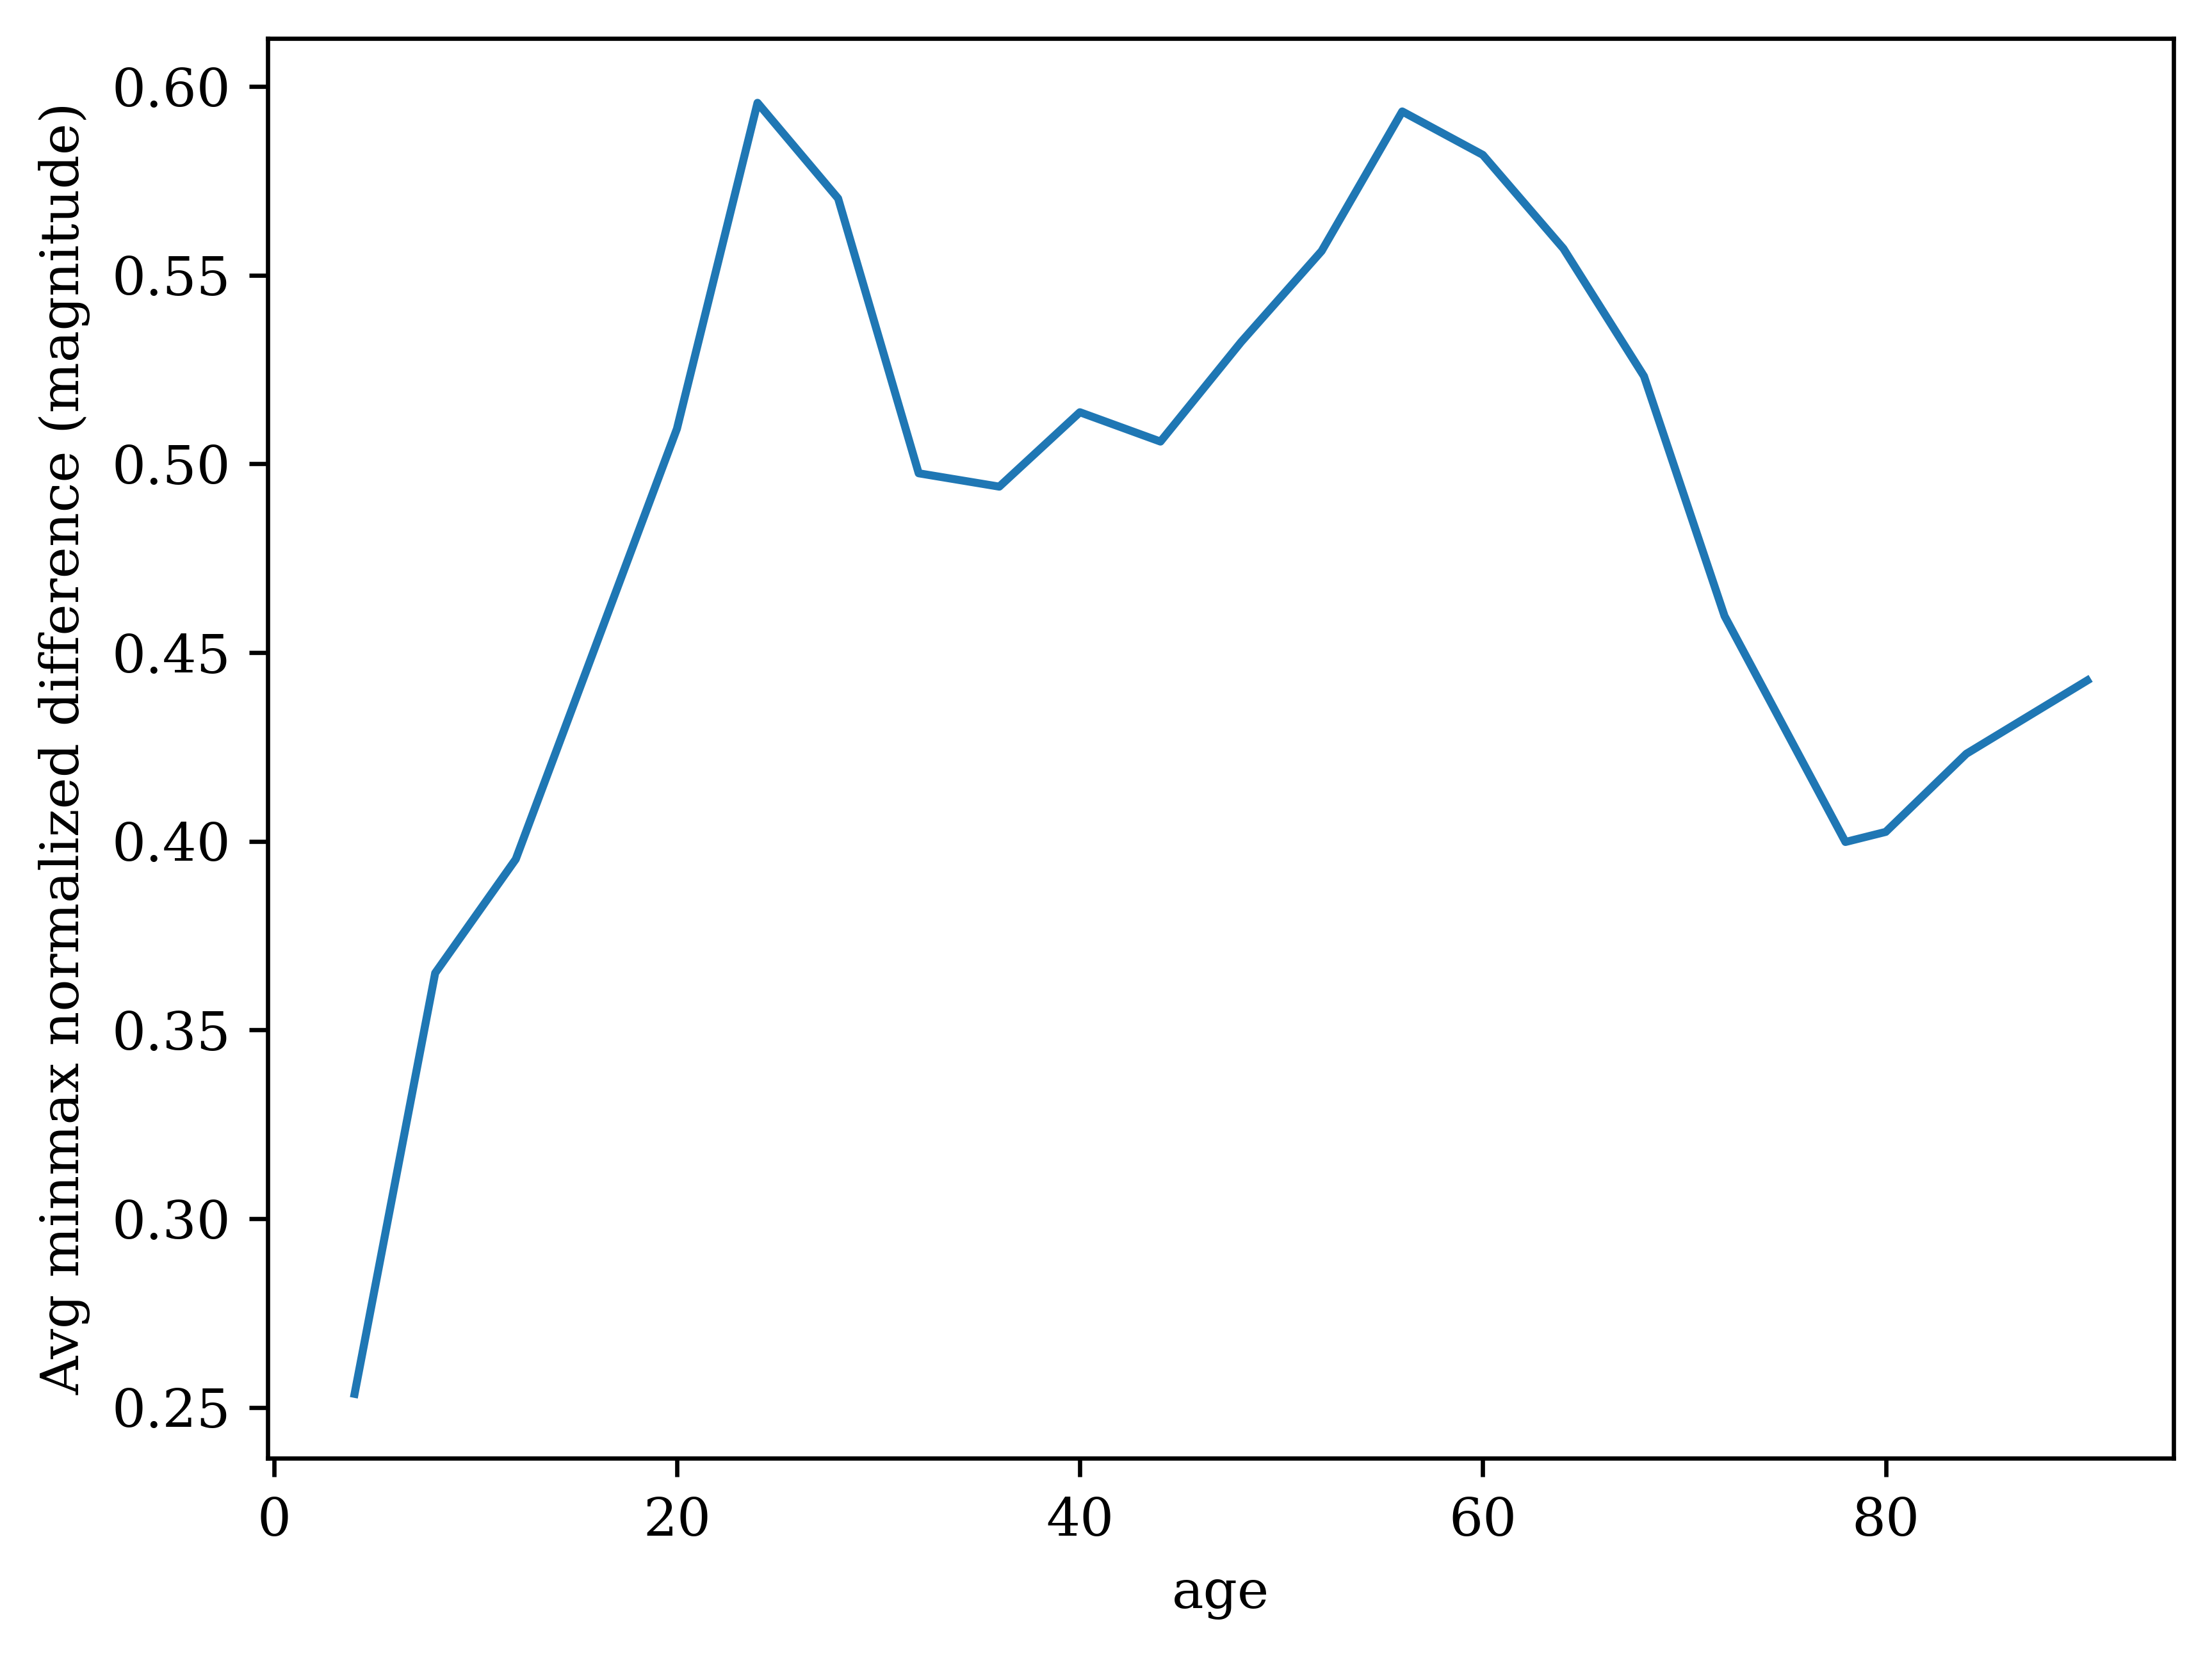

In [97]:
ax = minmax(sex_diffs[usage_order].abs()).mean(1).plot()
ax.set(ylabel='Avg minmax normalized difference (magnitude)')

<Axes: xlabel='age', ylabel='syllables'>

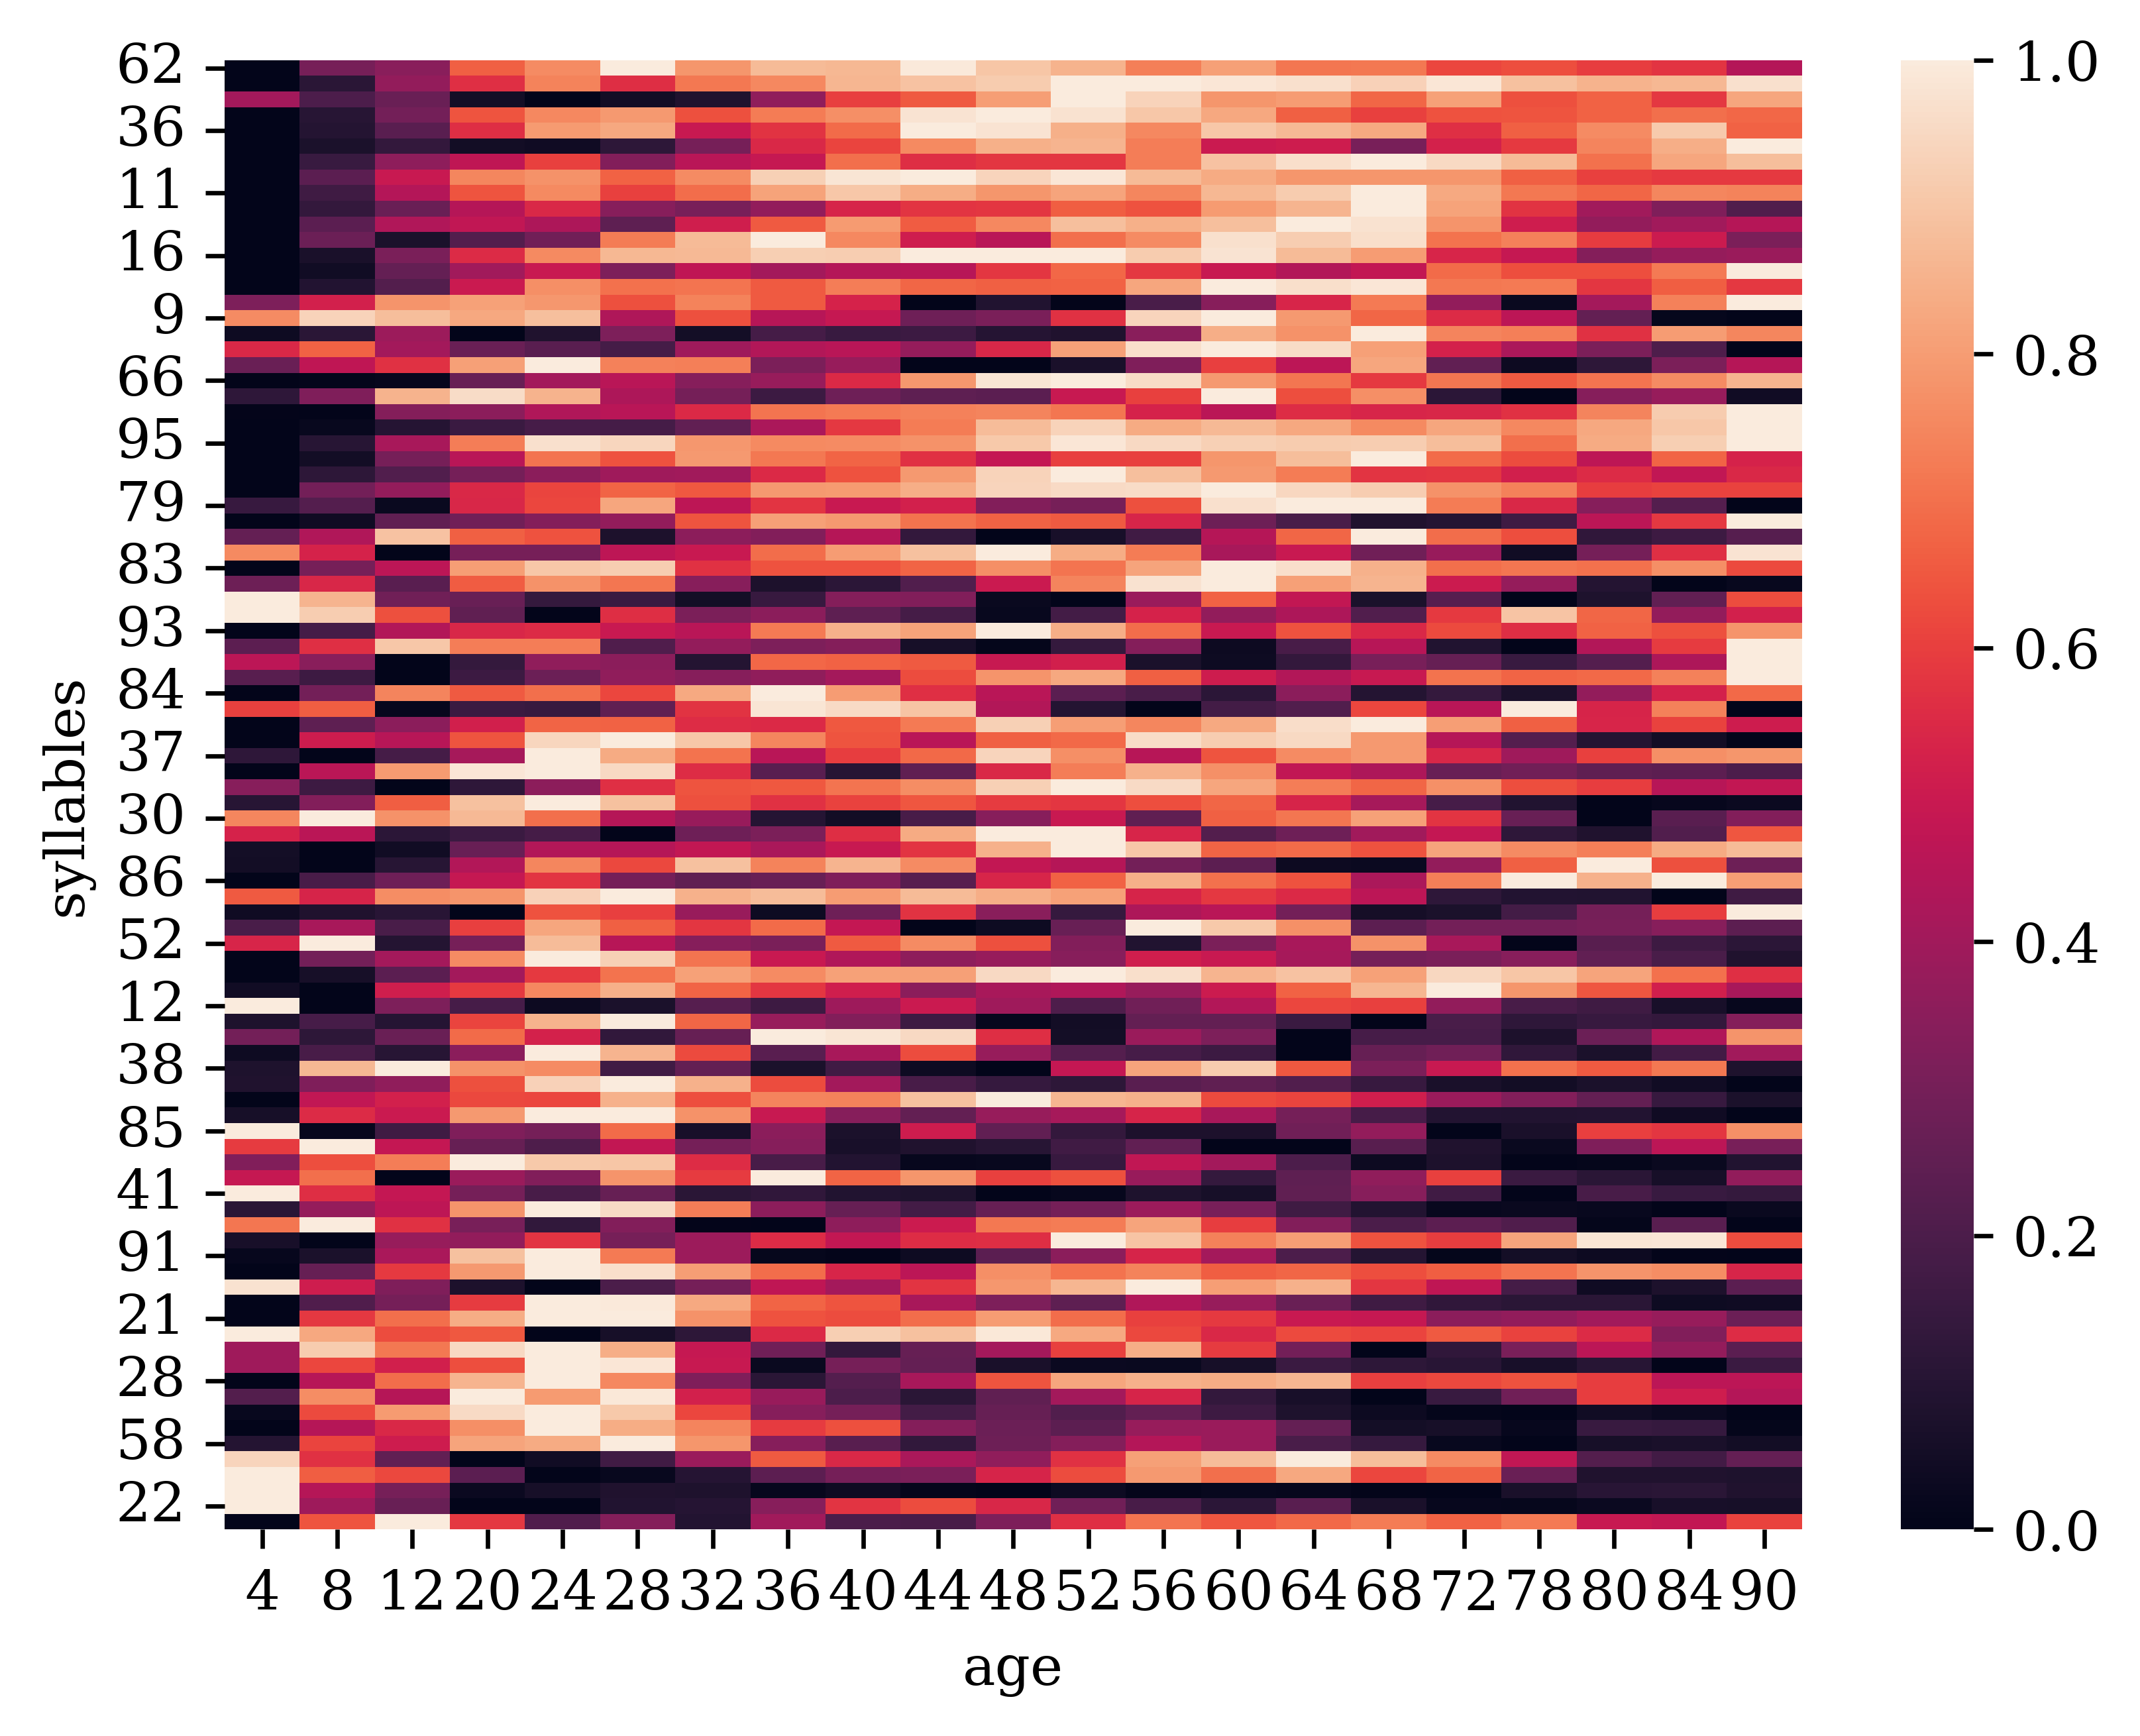

In [99]:
sns.heatmap(minmax(sex_diffs[usage_order].abs()).T, vmax=1)